<a href="https://colab.research.google.com/github/LeraDoroshenko/mn/blob/main/%D0%9B%D0%B0%D0%B13_1_%D0%94%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%92_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Завантажити Diabetes Dataset**

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes_data = load_diabetes(as_frame=True)
df = diabetes_data.frame

**2. Вивести перших 5 рядків.**

In [2]:
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


**3. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.**

In [3]:
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


**4. Перевірити наявність дублікатів, при виявленні – видалити.**

In [4]:
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

df = df.drop_duplicates()

Кількість дублікатів: 0


**5. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення.**

In [5]:
print(df['sex'].unique())
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

[ 0.05068012 -0.04464164]


**6. Перевірити тип даних. При необхідності замінити тип даних на числовий.**


In [6]:
print(df.dtypes)
df = df.apply(pd.to_numeric, errors='coerce')

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


**7. Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання. Побудувати теплову карту кореляції.**


target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
s3       -0.394789
sex            NaN
Name: target, dtype: float64


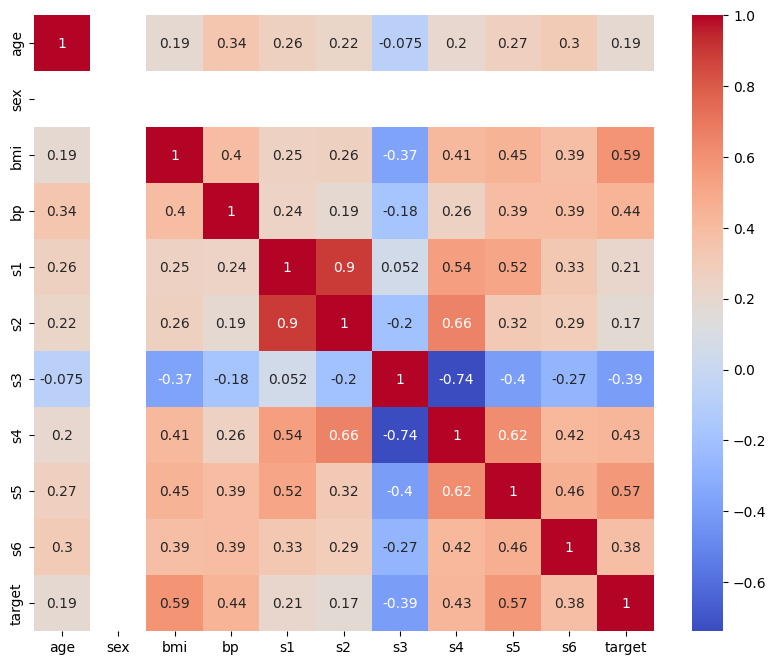

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

correlation_with_target = corr_matrix['target'].sort_values(ascending=False)
print(correlation_with_target)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**8. Масштабувати ознаки.**

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['target'])), columns=df.columns[:-1])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


**9. Поділити дані на тренувальну і тестову вибірки.**

In [10]:
from sklearn.model_selection import train_test_split

X = df_scaled
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**10. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число).**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print(pd.DataFrame(X_train).isnull().sum())

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin_reg = lin_reg.predict(X_test)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print(f"Linear Regression MSE: {mse_lin_reg}")
print(f"Linear Regression R2: {r2_lin_reg}")

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf_reg = rf_reg.predict(X_test)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

print(f"Random Forest Regression MSE: {mse_rf_reg}")
print(f"Random Forest Regression R2: {r2_rf_reg}")

print("Справжні значення:", y_test.values)
print("Прогнозовані значення (Linear Regression):", y_pred_lin_reg)
print("Прогнозовані значення (Random Forest):", y_pred_rf_reg)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
Linear Regression MSE: 2986.7329221144396
Linear Regression R2: 0.4362688983095515
Random Forest Regression MSE: 3056.7354438202246
Random Forest Regression R2: 0.42305626774920857
Справжні значення: [219.  70. 202. 230. 111.  84. 242. 272.  94.  96.  94. 252.  99. 297.
 135.  67. 295. 264. 170. 275. 310.  64. 128. 232. 129. 118. 263.  77.
  48. 107. 140. 113.  90. 164. 180. 233.  42.  84. 172.  63.  48. 108.
 156. 168.  90.  52. 200.  87.  90. 258. 136. 158.  69.  72. 171.  95.
  72. 151. 168.  60. 122.  52. 187. 102. 214. 248. 181. 110. 140. 202.
 101. 222. 281.  61.  89.  91. 186. 220. 237. 233.  68. 190.  96.  72.
 153.  98.  37.  63. 184.]
Прогнозовані значення (Linear Regression): [130.89093858 168.63506971 153.39426493 265.27306441 132.78329299
  86.79272611 276.2436239  198.35025785 103.60379863 125.979573
  89.83829677 153.64348094  48.26258653 212.39330795 112.53874429
 143.6135003  232.47769256 254.6

**11. Вивести коефіцієнт детермінації і середньоквадратичну помилку.**

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_lin = lin_reg.predict(X_test)
print(f"R2 (Linear Regression): {r2_score(y_test, y_pred_lin)}")
print(f"RMSE (Linear Regression): {mean_squared_error(y_test, y_pred_lin, squared=False)}")

y_pred_rf = rf_reg.predict(X_test)
print(f"R2 (Random Forest): {r2_score(y_test, y_pred_rf)}")
print(f"RMSE (Random Forest): {mean_squared_error(y_test, y_pred_rf, squared=False)}")

R2 (Linear Regression): 0.4362688983095515
RMSE (Linear Regression): 54.65101025703404
R2 (Random Forest): 0.42305626774920857
RMSE (Random Forest): 55.287751300086576


**12. Побудувати графіки.**

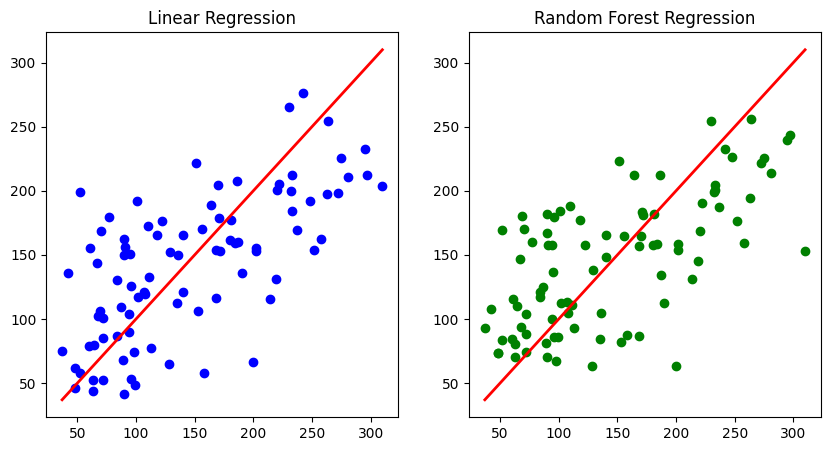

In [22]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lin, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Linear Regression')

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Random Forest Regression')

plt.show()

**13. Вивести справжні і прогнозовані значення.**

In [23]:
print("Справжні значення:", y_test.values)
print("Прогнозовані значення (Linear Regression):", y_pred_lin)
print("Прогнозовані значення (Random Forest):", y_pred_rf)

Справжні значення: [219.  70. 202. 230. 111.  84. 242. 272.  94.  96.  94. 252.  99. 297.
 135.  67. 295. 264. 170. 275. 310.  64. 128. 232. 129. 118. 263.  77.
  48. 107. 140. 113.  90. 164. 180. 233.  42.  84. 172.  63.  48. 108.
 156. 168.  90.  52. 200.  87.  90. 258. 136. 158.  69.  72. 171.  95.
  72. 151. 168.  60. 122.  52. 187. 102. 214. 248. 181. 110. 140. 202.
 101. 222. 281.  61.  89.  91. 186. 220. 237. 233.  68. 190.  96.  72.
 153.  98.  37.  63. 184.]
Прогнозовані значення (Linear Regression): [130.89093858 168.63506971 153.39426493 265.27306441 132.78329299
  86.79272611 276.2436239  198.35025785 103.60379863 125.979573
  89.83829677 153.64348094  48.26258653 212.39330795 112.53874429
 143.6135003  232.47769256 254.63051243 204.65325026 225.89312601
 203.42603317  79.34928824  64.65444863 199.47365089 152.48784061
 165.48188862 197.66289736 179.64005049  45.81056462 121.00279858
 165.57229744  77.55782437 149.60707014 189.06158762 161.92112063
 212.20278634 135.6256117

**14. Написати ВИСНОВКИ**